## hierarchical clustering

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [11]:
# importamos librerias
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go 
import plotly.express as px 

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler 
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Cargamos los datos
data = pd.read_csv('Mall_Customers.csv', sep=',')

In [23]:
data.head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [25]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

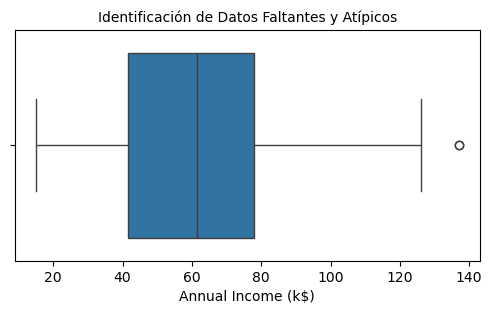

In [31]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

Identificar datos Faltantes

In [33]:
# Identificacion de los datos que faltan por columna
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

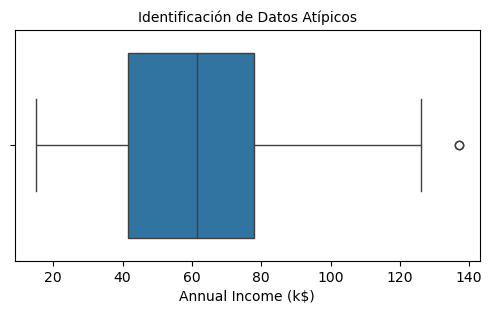

In [37]:

#Buscamos datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [41]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Annual Income (k$)']<nivel_minimo)|(data['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 14


In [43]:
# filtramos los datos atipicos
Datos=data[(data['Annual Income (k$)']<nivel_maximo)&(data['Annual Income (k$)']>nivel_minimo)]

In [47]:
#Revisamos los datos para verificar el filtro y el tipo de datos de las columnas

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [51]:

# Filtrar columnas del modelo 

Datos1 = Datos[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

In [53]:
# Revisión de los datos de las variables objetivo
Datos1.head(40)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


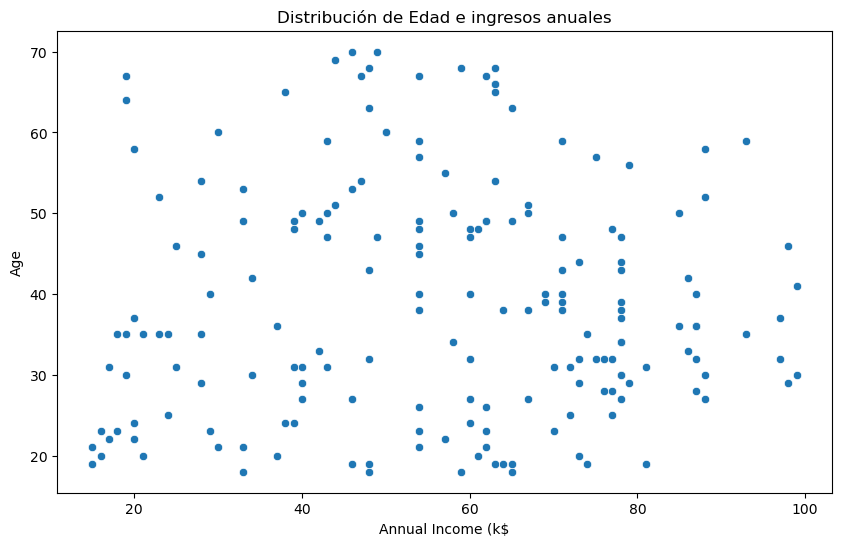

In [55]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Annual Income (k$)'], y=Datos1['Age'])
plt.title('Distribución de Edad e ingresos anuales')
plt.xlabel('Annual Income (k$')
plt.ylabel('Age')
plt.show()

Entrenar el modelo configurando los diferentes hiperparámetros

In [61]:
# Estandarizamos los dartos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age','Annual Income (k$)','Spending Score (1-100)']])

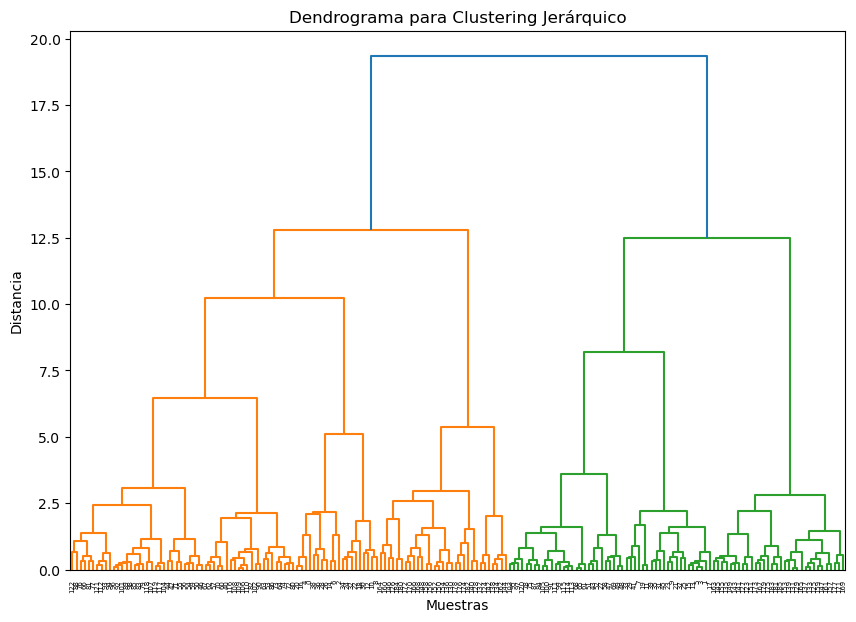

In [63]:

scaled_data = np.nan_to_num(scaled_data) 
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [75]:

Datos[['Age','Annual Income (k$)','Spending Score (1-100)']] = Datos[['Age','Annual Income (k$)','Spending Score (1-100)']].fillna(Datos[['Age','Annual Income (k$)','Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age','Annual Income (k$)','Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.33213815748086906
Índice de Calinski-Harabasz: 84.90139875046562
Índice de Davies-Bouldin: 1.1305024940373656


6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [77]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=5)  # Ajustar el número de clusters
Datos1['Cluster'] = model.fit_predict(scaled_data)


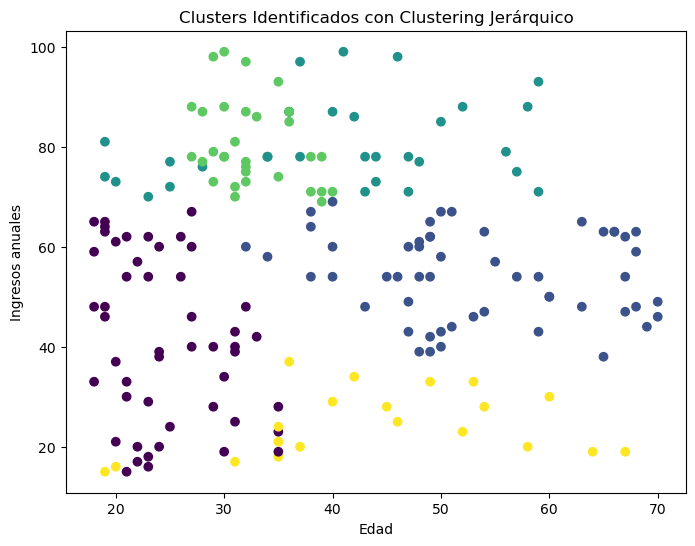

In [89]:
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], c=Datos1['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingresos anuales')
plt.show()

Silhouette Score: 0.42270306144578834


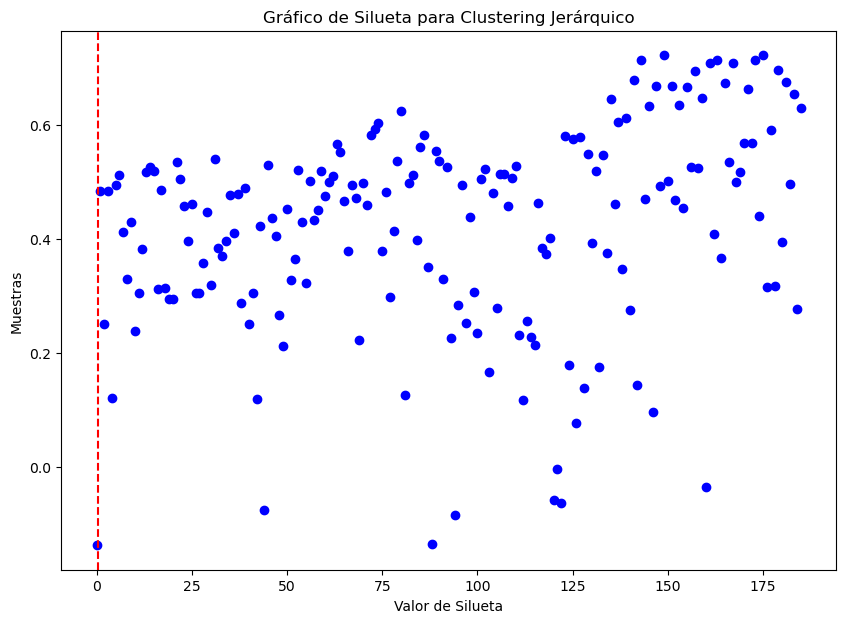

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

In [ ]:
## 7. Interpretar, analizar y documentar los resultados obtenidos

- En el gráfico de silueta las Silhouettes están mas agrupadas y muy cercanas a +1, esto demuestra que los datos estan bien asignados a su closter y garantiza la veracidad de la infroamcion mostrada
- El clostering demuestra que la edad de las personas influye en los patrones de ingresos anules de dinero
- El Davies-Bouldin de 1.1305024940373656 nos indica que los closters no estan separados de manera perfecta pero tambien demuestra que no estan demaciado dispersos.